In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import re
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import netCDF4 as nc

from sqlalchemy.sql import select, and_, or_, not_, func
from sqlalchemy import create_engine, Column, String, Integer, Boolean, MetaData, Table, case, between, ForeignKey, desc
from sqlalchemy.orm import mapper, create_session, relationship
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.ext.automap import automap_base
import sqlalchemy.types as types
from sqlalchemy.sql import select, and_, or_, not_, func
from time import strptime
import string
import pandas as pd
from dateutil.parser import parse as dutparse

%matplotlib inline

In [2]:
basepath='/ocean/eolson/MEOPAR/obs/'
basedir=basepath + 'ECBuoy/'
dbname='ECBuoy'
Base = automap_base()
engine = create_engine('sqlite:///' + basedir + dbname + '.sqlite', echo = False)
# reflect the tables in salish.sqlite:
Base.prepare(engine, reflect=True)
# mapped classes have been created
FBuoyTBL=Base.classes.FBuoyTBL
FlowTBL=Base.classes.FlowTBL
session = create_session(bind = engine, autocommit = False, autoflush = True)

In [3]:
df=pd.DataFrame(session.query(FlowTBL.DecDay,FlowTBL.RateHope).filter(FlowTBL.RateHope>=0).all())

In [5]:
dts=[dt.datetime(1900,1,1)+dt.timedelta(days=ii) for ii in df['DecDay']]

In [10]:
df['YD']=[(ii-dt.datetime(ii.year-1,12,31)).days for ii in dts]
df['Year']=[ii.year for ii in dts]

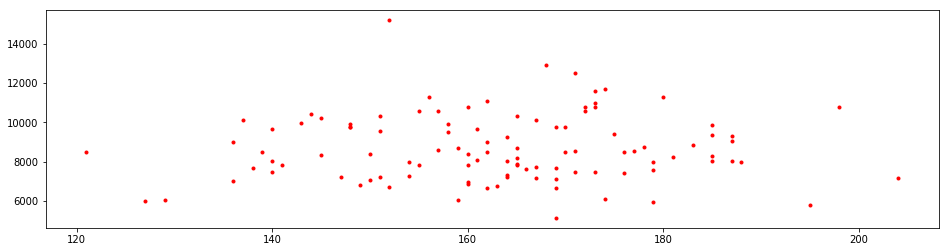

In [14]:
fig,ax=plt.subplots(1,1,figsize=(16,4))
for yr in np.unique(df['Year']):
    df2=df.loc[df.Year==yr]
    maxval=np.max(df2['RateHope'])
    ax.plot(df2.loc[df2.RateHope==maxval,['YD']].values[0],maxval,'r.')

In [18]:
for iid in (121,140,160,180,200,135,190):
    print(iid, dt.datetime(2014,12,31)+dt.timedelta(days=iid))

121 2015-05-01 00:00:00
140 2015-05-20 00:00:00
160 2015-06-09 00:00:00
180 2015-06-29 00:00:00
200 2015-07-19 00:00:00
135 2015-05-15 00:00:00
190 2015-07-09 00:00:00


In [19]:
session.close()
engine.dispose()